In [11]:
library(tidyr)
library(dplyr)
library(readr)
library(basetheme)
library(phangorn)
library(ape)
library(ade4)
library(ggtree)
library(colorspace)
library(adegenet)
library(dendextend)
library(circlize)
library(ggplot2)

In [46]:
deletions = read.csv("../data/deletions_overlapped_archaic.csv")
duplications = read.csv("../data/duplications_overlapped_archaic.csv")
sgdp_cnv = read.csv("../data/cnvator_data_archaic_overlapped.csv")
anotation = read.csv("../data/SGDP_anotation.csv")
sgdp_cnv

Sample_ID         Chr Start_original End_original Start    End      SIZE
1      LP6005441-DNA_A01 1     231001         237900       228416   267160 3   
2      LP6005441-DNA_A01 1     471201         551200       521526   568203 1   
3      LP6005441-DNA_A01 1     561401         563700       521526   568203 1   
4      LP6005441-DNA_A01 1    1010901        1014200      1009660  1015541 1   
5      LP6005441-DNA_A01 1    1642401        1646800      1620732  1662311 1   
6      LP6005441-DNA_A01 1    4124201        4127700      4120597  4131559 1   
7      LP6005441-DNA_A01 1   12843601       12845200     12835844 12856173 1   
8      LP6005441-DNA_A01 1   12843601       12845200     12839911 12850298 1   
9      LP6005441-DNA_A01 1   12882901       12892500     12887258 12895480 1   
10     LP6005441-DNA_A01 1   12931701       12937200     12937112 12951157 3   
11     LP6005441-DNA_A01 1   12931701       12937200     12908735 12950181 3   
12     LP6005441-DNA_A01 1   12931701       12937200     12908735 12937112 3   
13     LP6005441-DNA_A01 1   12941801       12944400     12937112 12951157 1   
14     LP6005441-DNA_A01 1   12941801       12944400     12908735 12950181 1   
15     LP6005441-DNA_A01 1   12952701       12966500     12944622 13030948 1   
16     LP6005441-DNA_A01 1   12952701       12966500     12950181 12996451 1   
17     LP6005441-DNA_A01 1   12972901       12974500     12944622 13030948 1   
18     LP6005441-DNA_A01 1   12972901       12974500     12950181 12996451 1   
19     LP6005441-DNA_A01 1   12977301       12978400     12944622 13030948 1   
20     LP6005441-DNA_A01 1   12977301       12978400     12950181 12996451 1   
21     LP6005441-DNA_A01 1   12993701       13047100     12944622 13030948 1   
22     LP6005441-DNA_A01 1   12993701       13047100     12950181 12996451 1   
23     LP6005441-DNA_A01 1   13052901       13132400     13106780 13123007 1   
24     LP6005441-DNA_A01 1   13052901       13132400     13121719 13124296 1   
25     LP6005441-DNA_A01 1   13052901       13132400     13103107 13124296 1   
26     LP6005441-DNA_A01 1   13052901       13132400     13103107 13106780 1   
27     LP6005441-DNA_A01 1   13178001       13182000     13176496 13192569 3   
28     LP6005441-DNA_A01 1   16875201       16884000     16875428 16971661 3   
29     LP6005441-DNA_A01 1   16885001       16906500     16890214 17007784 3   
30     LP6005441-DNA_A01 1   16885001       16906500     16894819 16971661 3   
⋮      ⋮                 ⋮   ⋮              ⋮            ⋮        ⋮        ⋮   
405678 SS6004480         22  20503601       20612400     20310273 20503817 1   
405679 SS6004480         22  21490001       21493300     21461146 21797656 3   
405680 SS6004480         22  21490001       21493300     21461146 21711330 3   
405681 SS6004480         22  21496801       21501400     21461146 21797656 3   
405682 SS6004480         22  21496801       21501400     21461146 21711330 3   
405683 SS6004480         22  21517101       21521100     21461146 21797656 1   
405684 SS6004480         22  21517101       21521100     21461146 21711330 1   
405685 SS6004480         22  21562801       21564300     21461146 21797656 1   
405686 SS6004480         22  21562801       21564300     21461146 21711330 1   
405687 SS6004480         22  21582301       21585700     21461146 21797656 3   
405688 SS6004480         22  21582301       21585700     21461146 21711330 3   
405689 SS6004480         22  21590001       21614400     21461146 21797656 3   
405690 SS6004480         22  21590001       21614400     21461146 21711330 3   
405691 SS6004480         22  21707501       21710200     21461146 21797656 3   
405692 SS6004480         22  21707501       21710200     21461146 21711330 3   
405693 SS6004480         22  21714401       21715600     21461146 21797656 1   
405694 SS6004480         22  21726101       21731700     21461146 21797656 1   
405695 SS6004480         22  21748601       21750000     21461146 21797656 1   
405696 

In [13]:
anotation = anotation[order(anotation$X3.Illumina_ID),]
colnames(anotation)[2] ="id"
colnames(anotation)[9] ="Region"
anotation_2 = as.data.frame(anotation[,c(2,9)])
rownames(anotation_2) <- anotation_2$id
anotation_2$id <- NULL
anotation_2

Region            
LP6005441-DNA_A01 WestEurasia       
LP6005441-DNA_A03 Oceania           
LP6005441-DNA_A04 America           
LP6005441-DNA_A05 WestEurasia       
LP6005441-DNA_A06 WestEurasia       
LP6005441-DNA_A08 Africa            
LP6005441-DNA_A09 EastAsia          
LP6005441-DNA_A10 Oceania           
LP6005441-DNA_A11 Africa            
LP6005441-DNA_A12 America           
LP6005441-DNA_B01 WestEurasia       
LP6005441-DNA_B02 Africa            
LP6005441-DNA_B03 Oceania           
LP6005441-DNA_B04 America           
LP6005441-DNA_B05 WestEurasia       
LP6005441-DNA_B06 WestEurasia       
LP6005441-DNA_B07 EastAsia          
LP6005441-DNA_B08 Africa            
LP6005441-DNA_B09 EastAsia          
LP6005441-DNA_B10 Oceania           
LP6005441-DNA_B11 Africa            
LP6005441-DNA_B12 America           
LP6005441-DNA_C01 SouthAsia         
LP6005441-DNA_C02 WestEurasia       
LP6005441-DNA_C03 SouthAsia         
LP6005441-DNA_C05 EastAsia          
LP6005441-DNA_C06 EastAsia          
LP6005441-DNA_C07 SouthAsia         
LP6005441-DNA_C08 EastAsia          
LP6005441-DNA_C09 WestEurasia       
⋮                 ⋮                 
LP6005592-DNA_H01 WestEurasia       
LP6005592-DNA_H03 Oceania           
LP6005619-DNA_B01 Africa            
LP6005619-DNA_C01 Africa            
LP6005677-DNA_A02 CentralAsiaSiberia
LP6005677-DNA_A03 WestEurasia       
LP6005677-DNA_B01 WestEurasia       
LP6005677-DNA_B02 CentralAsiaSiberia
LP6005677-DNA_C03 WestEurasia       
LP6005677-DNA_D01 America           
LP6005677-DNA_D03 Africa            
LP6005677-DNA_E01 America           
LP6005677-DNA_F01 America           
LP6005677-DNA_G01 Africa            
LP6007068-DNA_A01 WestEurasia       
LP6007069-DNA_A01 WestEurasia       
SS6004467         EastAsia          
SS6004468         WestEurasia       
SS6004469         EastAsia          
SS6004470         Africa            
SS6004471         Africa            
SS6004472         Oceania           
SS6004473         Africa            
SS6004474         WestEurasia       
SS6004475         Africa            
SS6004476         America           
SS6004477         Oceania           
SS6004478         Oceania           
SS6004479         America           
SS6004480         Africa

In [14]:
sgdp_cnv <- sgdp_cnv[c(1, 2, 5, 6, 9)]
#iris[c(1, 51, 101, 2, 52, 102), ]
deletions = filter(sgdp_cnv, RD < 2)
duplications = filter(sgdp_cnv, RD > 2)
duplications
#duplications[is.na(duplications)] <- 2"

Sample_ID         Chr Start     End       RD     
1     LP6005441-DNA_A01 1      228416    267160 2.08923
2     LP6005441-DNA_A01 1    16890214  17007784 4.28452
3     LP6005441-DNA_A01 1    16894819  16971661 4.28452
4     LP6005441-DNA_A01 1    16875428  16971661 4.28452
5     LP6005441-DNA_A01 1    16890214  17007784 3.29353
6     LP6005441-DNA_A01 1    16894819  16971661 3.29353
7     LP6005441-DNA_A01 1    16875428  16971661 3.29353
8     LP6005441-DNA_A01 1    16890214  17007784 3.66919
9     LP6005441-DNA_A01 1    16894819  16971661 3.66919
10    LP6005441-DNA_A01 1    16875428  16971661 3.66919
11    LP6005441-DNA_A01 1    16971661  17007784 3.66919
12    LP6005441-DNA_A01 1    16890214  17007784 2.39867
13    LP6005441-DNA_A01 1    16971661  17007784 2.39867
14    LP6005441-DNA_A01 1    16890214  17007784 2.18287
15    LP6005441-DNA_A01 1    16971661  17007784 2.18287
16    LP6005441-DNA_A01 1    16890214  17007784 2.63076
17    LP6005441-DNA_A01 1    17007784  17009246 2.63076
18    LP6005441-DNA_A01 1    17051972  17124790 2.63076
19    LP6005441-DNA_A01 1    16971661  17007784 2.63076
20    LP6005441-DNA_A01 1    17013405  17051972 2.63076
21    LP6005441-DNA_A01 1    17009246  17013005 2.63076
22    LP6005441-DNA_A01 1    17013005  17013405 2.63076
23    LP6005441-DNA_A01 1    17201579  17206855 2.03563
24    LP6005441-DNA_A01 1    17201579  17216388 2.03563
25    LP6005441-DNA_A01 1    17231801  17255960 2.03563
26    LP6005441-DNA_A01 1    17176853  17197731 2.03563
27    LP6005441-DNA_A01 1    17206855  17216388 2.03563
28    LP6005441-DNA_A01 1    17201579  17281753 2.03563
29    LP6005441-DNA_A01 1   142782992 142796419 4.52468
30    LP6005441-DNA_A01 1   143117904 143268032 2.04371
⋮     ⋮                 ⋮   ⋮         ⋮         ⋮      
60910 SS6004480         21   9735114   9774965  2.84855
60911 SS6004480         21   9645885   9735114  2.84855
60912 SS6004480         21   9734614   9738824  2.84855
60913 SS6004480         21   9734114   9735114  2.84855
60914 SS6004480         21   9735114   9774965  2.25294
60915 SS6004480         21   9735114   9774965  2.31196
60916 SS6004480         21   9827971   9834095  3.80805
60917 SS6004480         21   9867342  10034834  3.80805
60918 SS6004480         21   9867342   9929848  3.80805
60919 SS6004480         21   9827971   9867342  3.80805
60920 SS6004480         21   9867342  10034834  2.26772
60921 SS6004480         21  10088819  10215818  3.45809
60922 SS6004480         21  10088819  10215818  2.26612
60923 SS6004480         21  10088819  10215818  2.12288
60924 SS6004480         21  10088819  10215818  2.24069
60925 SS6004480         21  10088819  10215818  2.29170
60926 SS6004480         21  10088819  10215818  2.76274
60927 SS6004480         21  10088819  10215818  2.09118
60928 SS6004480         21  10885234  10895330  3.53039
60929 SS6004480         21  10860899  10890282  3.53039
60930 SS6004480         21  10860899  10885234  3.53039
60931 SS6004480         21  10860899  11151514  3.53039
60932 SS6004480         21  11030705  11181656  4.92085
60933 SS6004480         21  11030705  11054591  4.92085
60934 SS6004480         21  10860899  11151514  4.92085
60935 SS6004480         21  11030705  11181656  3.98031
60936 SS6004480         21  10860899  11151514  3.98031
60937 SS6004480         21  11151514  11181656  4.20360
60938 SS6004480         21  11030705  11181656  4.20360
60939 SS6004480         21  10860899  11151514  4.20360

In [15]:
df = pivot_wider(deletions, names_from = Sample_ID, values_from = RD, values_fn = list(RD = mean),
     values_fill = list(RD = 2),)
drop <- c("Chr","Start", "End")
df = df[,!(names(df) %in% drop)]
df = t(df)
df = as.data.frame(df)
df

V1        V2       V3        V4        V5       V6      
LP6005441-DNA_A01 0.3517180 0.498249 0.4793670 0.5055710 0.596256 0.596256
LP6005441-DNA_A03 0.3814989 2.000000 0.6123935 2.0000000 2.000000 2.000000
LP6005441-DNA_A04 0.3531395 0.451920 0.5594760 0.4343250 0.396989 0.396989
LP6005441-DNA_A05 2.0000000 0.226983 0.5772520 2.0000000 0.624063 0.624063
LP6005441-DNA_A06 1.5016350 0.358707 0.4453600 0.0555952 2.000000 2.000000
LP6005441-DNA_A08 0.4490983 0.206298 0.8869173 2.0000000 2.000000 2.000000
LP6005441-DNA_A09 0.3144630 0.280867 0.4969290 0.1301550 2.000000 2.000000
LP6005441-DNA_A10 0.1521280 0.173932 0.4698830 2.0000000 2.000000 2.000000
LP6005441-DNA_A11 1.5255550 0.272102 1.0400415 2.0000000 2.000000 2.000000
LP6005441-DNA_A12 0.6832776 0.215879 0.5426180 2.0000000 1.490110 1.490110
LP6005441-DNA_B01 2.0000000 2.000000 2.0000000 0.5322500 1.303730 1.303730
LP6005441-DNA_B02 1.1613390 0.251450 2.0000000 2.0000000 2.000000 2.000000
LP6005441-DNA_B04 0.3626760 0.222056 0.4910140 0.5005250 1.321900 1.321900
LP6005441-DNA_B05 0.0866972 0.406113 0.5454160 0.5228600 2.000000 2.000000
LP6005441-DNA_B06 2.0000000 0.173068 2.0000000 0.5536350 2.000000 2.000000
LP6005441-DNA_B07 2.0000000 2.000000 0.5767290 0.4738200 2.000000 2.000000
LP6005441-DNA_B08 0.2498125 0.239254 0.3892690 2.0000000 2.000000 2.000000
LP6005441-DNA_B09 1.2821008 2.000000 2.0000000 0.5485660 1.509810 2.000000
LP6005441-DNA_B10 0.1695151 0.185726 0.5525520 2.0000000 1.311450 1.311450
LP6005441-DNA_B11 0.3928205 0.301904 1.0494445 0.0268598 1.743110 1.743110
LP6005441-DNA_B12 0.0327684 0.247274 2.0000000 0.5472350 2.000000 2.000000
LP6005441-DNA_C01 0.3272830 0.363561 0.5631790 0.0179254 2.000000 2.000000
LP6005441-DNA_C02 0.2998600 0.379573 0.6021960 0.0353641 1.375775 1.366510
LP6005441-DNA_C03 0.6938920 0.167479 0.5883550 0.0103178 2.000000 2.000000
LP6005441-DNA_C05 0.1807920 0.458797 2.0000000 0.5321370 1.553670 2.000000
LP6005441-DNA_C06 0.4305179 0.151268 0.5656220 0.5076440 1.579550 2.000000
LP6005441-DNA_C07 0.2188620 0.196828 0.5054340 0.5187540 1.443020 1.443020
LP6005441-DNA_C08 0.6154730 0.263631 2.0000000 0.0139768 0.681115 0.681115
LP6005441-DNA_C09 0.2695910 0.422800 0.4583050 0.0443722 2.000000 2.000000
LP6005441-DNA_C10 0.1692380 0.489263 2.0000000 0.4876280 2.000000 2.000000
⋮                 ⋮         ⋮        ⋮         ⋮         ⋮        ⋮       
LP6005592-DNA_H01 0.4612367 0.203509 2.0000000 0.5394360 2.000000 2.000000
LP6005592-DNA_H03 0.7011755 0.288115 0.6484420 2.0000000 1.437645 1.448170
LP6005619-DNA_B01 0.5835030 0.355888 0.4355490 0.0635326 2.000000 2.000000
LP6005619-DNA_C01 1.2171700 0.349068 2.0000000 2.0000000 2.000000 2.000000
LP6005677-DNA_A02 0.7348370 0.185113 1.7462300 0.5496750 2.000000 2.000000
LP6005677-DNA_A03 0.3962605 0.442263 0.5565560 0.5802960 2.000000 2.000000
LP6005677-DNA_B01 1.5782600 0.411741 1.1411755 0.5592330 2.000000 2.000000
LP6005677-DNA_B02 1.4305300 0.362900 0.4383240 0.5934280 2.000000 2.000000
LP6005677-DNA_C03 2.0000000 0.252531 0.3825030 0.5226420 2.000000 2.000000
LP6005677-DNA_D01 0.3913791 0.214543 0.5094310 0.5320600 2.000000 2.000000
LP6005677-DNA_D03 0.5298630 0.297397 1.5382700 0.6857430 2.000000 2.000000
LP6005677-DNA_E01 1.5585967 0.314478 0.6090740 0.5362360 0.585268 0.585268
LP6005677-DNA_F01 1.6415800 0.380930 2.0000000 2.0000000 2.000000 2.000000
LP6005677-DNA_G01 0.7987468 0.355603 2.0000000 0.5885940 2.000000 2.000000
LP6007068-DNA_A01 0.1362980 0.333257 0.5906745 2.0000000 1.529980 1.375840
LP6007069-DNA_A01 0.2693730 2.000000 0.1820105 2.0000000 2.000000 2.000000
SS6004467         0.1739190 0.222689 0.4069720 1.9992500 2.000000 2.000000
SS6004468         0.1421340 0.490034 0.4161485 2.0000000 1.566170 1.431010
SS6004469         1.6590850 0.381108 0.4542830 1.8903200 1.484550 2.000000
SS6004470         2.0000000 0.394913 0.5310305 1.8452900 2.000000 2.000000
SS6004471         1.2238500 0.373708 0.5074805 2.0000000 2.000000 2.000000
SS6004472         0.1897643 0.339405 0.5527

In [16]:
df1 = merge(anotation_2, df, by=0, all=TRUE)
df1[, 'Region'] <- as.factor(df1[, 'Region'])
df2 = na.omit(df1)
row.names(df2) <- df2$Row.names
regions = df2[,c(1,2)]
df2[1] <- NULL

df1 = df2[,-1]


In [17]:
D = dist(df1, method= "manhattan")

In [18]:
hclust(d = D, method = "ward.D")


Call:
hclust(d = D, method = "ward.D")

Cluster method   : ward.D 
Distance         : manhattan 
Number of objects: 276 


In [19]:
tre <- dist(df1, method="manhattan")
tre

                  LP6005441-DNA_A01 LP6005441-DNA_A03 LP6005441-DNA_A04
LP6005441-DNA_A03          706.4629                                    
LP6005441-DNA_A04          723.9920          645.6529                  
LP6005441-DNA_A05          629.7780          712.9493          682.8848
LP6005441-DNA_A06          733.2522          730.8825          783.6543
LP6005441-DNA_A08          809.7758          756.4640          787.8828
LP6005441-DNA_A09          720.1101          612.9410          663.5477
LP6005441-DNA_A10          803.8898          632.5006          691.4917
LP6005441-DNA_A11          842.4929          734.0673          784.2345
LP6005441-DNA_A12          714.0339          636.5866          508.8079
LP6005441-DNA_B01          618.1711          645.5495          718.9006
LP6005441-DNA_B02          800.8086          734.0017          763.0003
LP6005441-DNA_B04          723.7285          644.8597          486.7638
LP6005441-DNA_B05          683.1775          653.9591          7

In [20]:
tre <- hclust(D, method="ward.D")
tre


Call:
hclust(d = D, method = "ward.D")

Cluster method   : ward.D 
Distance         : manhattan 
Number of objects: 276 


In [21]:
dend <- as.dendrogram(hclust(dist(df1),  method="ward.D"))

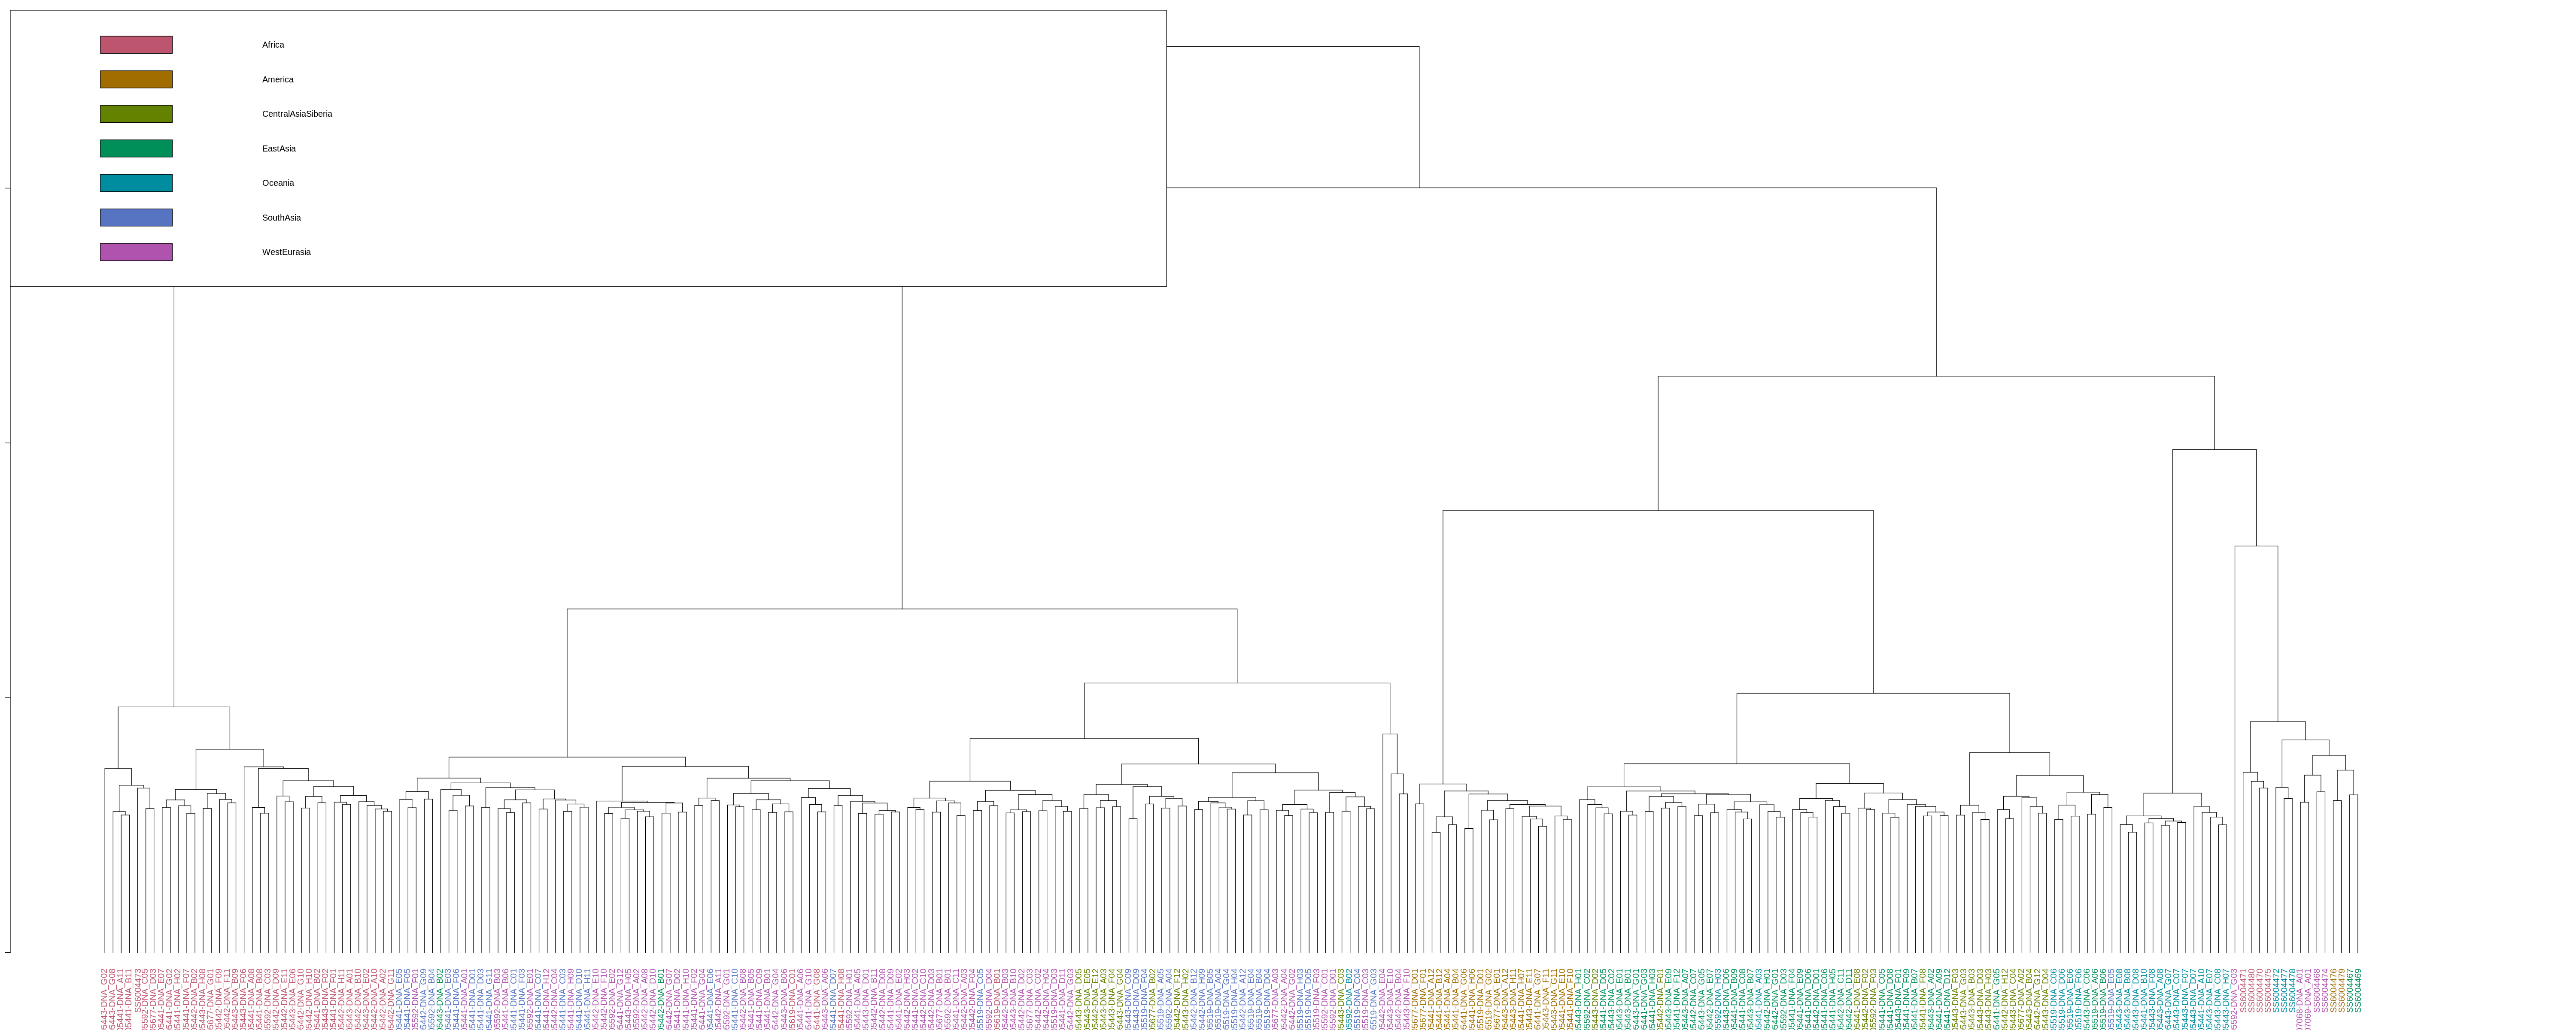

In [22]:
# Create a vector giving a color for each invidiual to which region it belongs to
# Change height/width to rescale your figure
options(repr.plot.width=50, repr.plot.height=20) ; par(oma=c(0,0,0,0))
type <- regions$Region
n_types <- length(unique(type))
cols_7 <- colorspace::rainbow_hcl(n_types, c = 70, l  = 50)
col_type <- cols_7[type]
# color labels by region
labels_colors(dend) <- col_type[order.dendrogram(dend)]
# color branches based on cutting the tree into 4 clusters:\n",
#dend <- color_branches(dend, k = 10)\n",
par(mar = c(4,1,1,12))
plot(dend)
#colored_bars(cbind(k234[,3:1], col_car_type), dend, rowLabels = c(paste0(\"k = \", 4:2), \"Car Type\"), horiz = TRUE)\n",
legend("topleft", legend = levels(type), fill = cols_7)

In [23]:
ant = df2[,c(1,2)]

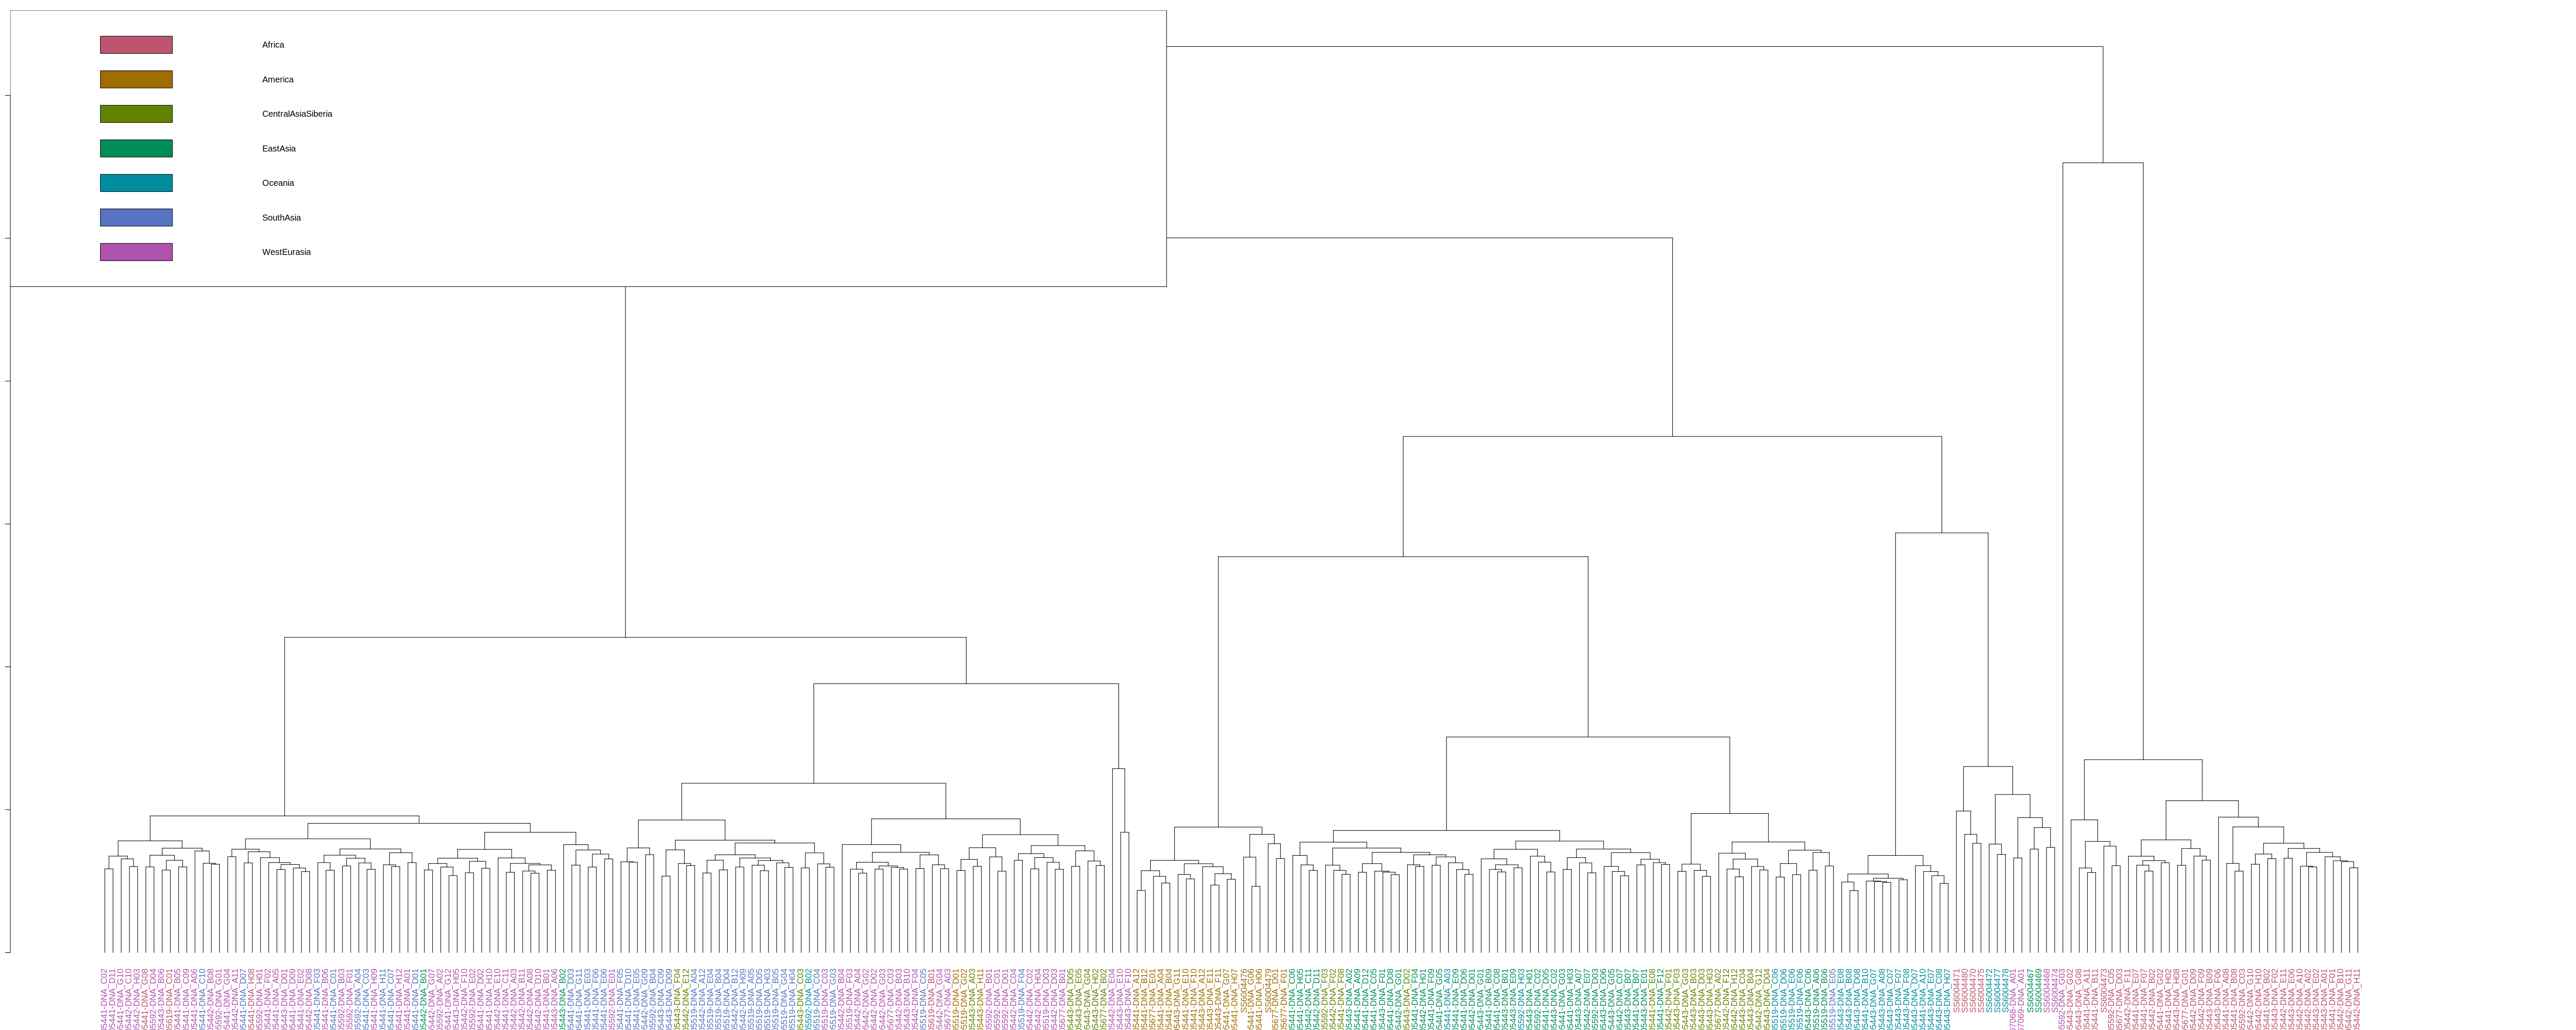

In [24]:
# Create a vector giving a color for each car to which company it belongs to


dend <- as.dendrogram(hclust(D,  method="ward.D"))


car_type <- regions$Region
n_car_types <- length(unique(car_type))
cols_7 <- colorspace::rainbow_hcl(n_car_types, c = 70, l  = 50)
col_car_type <- cols_7[car_type]

# color labels by car company:
labels_colors(dend) <- col_car_type[order.dendrogram(dend)]
# color branches based on cutting the tree into 4 clusters:
#dend <- color_branches(dend, k = 10)
par(mar = c(4,1,1,12))
plot(dend)
#colored_bars(cbind(k234[,3:1], col_car_type), dend, rowLabels = c(paste0(\"k = \", 4:2), \"Car Type\"), horiz = TRUE)\n",
legend("topleft", legend = levels(car_type), fill = cols_7)

In [25]:
dend <- as.dendrogram(hclust(D,  method="ward.D"))
dend

'dendrogram' with 2 branches and 276 members total, at height 6341.828 

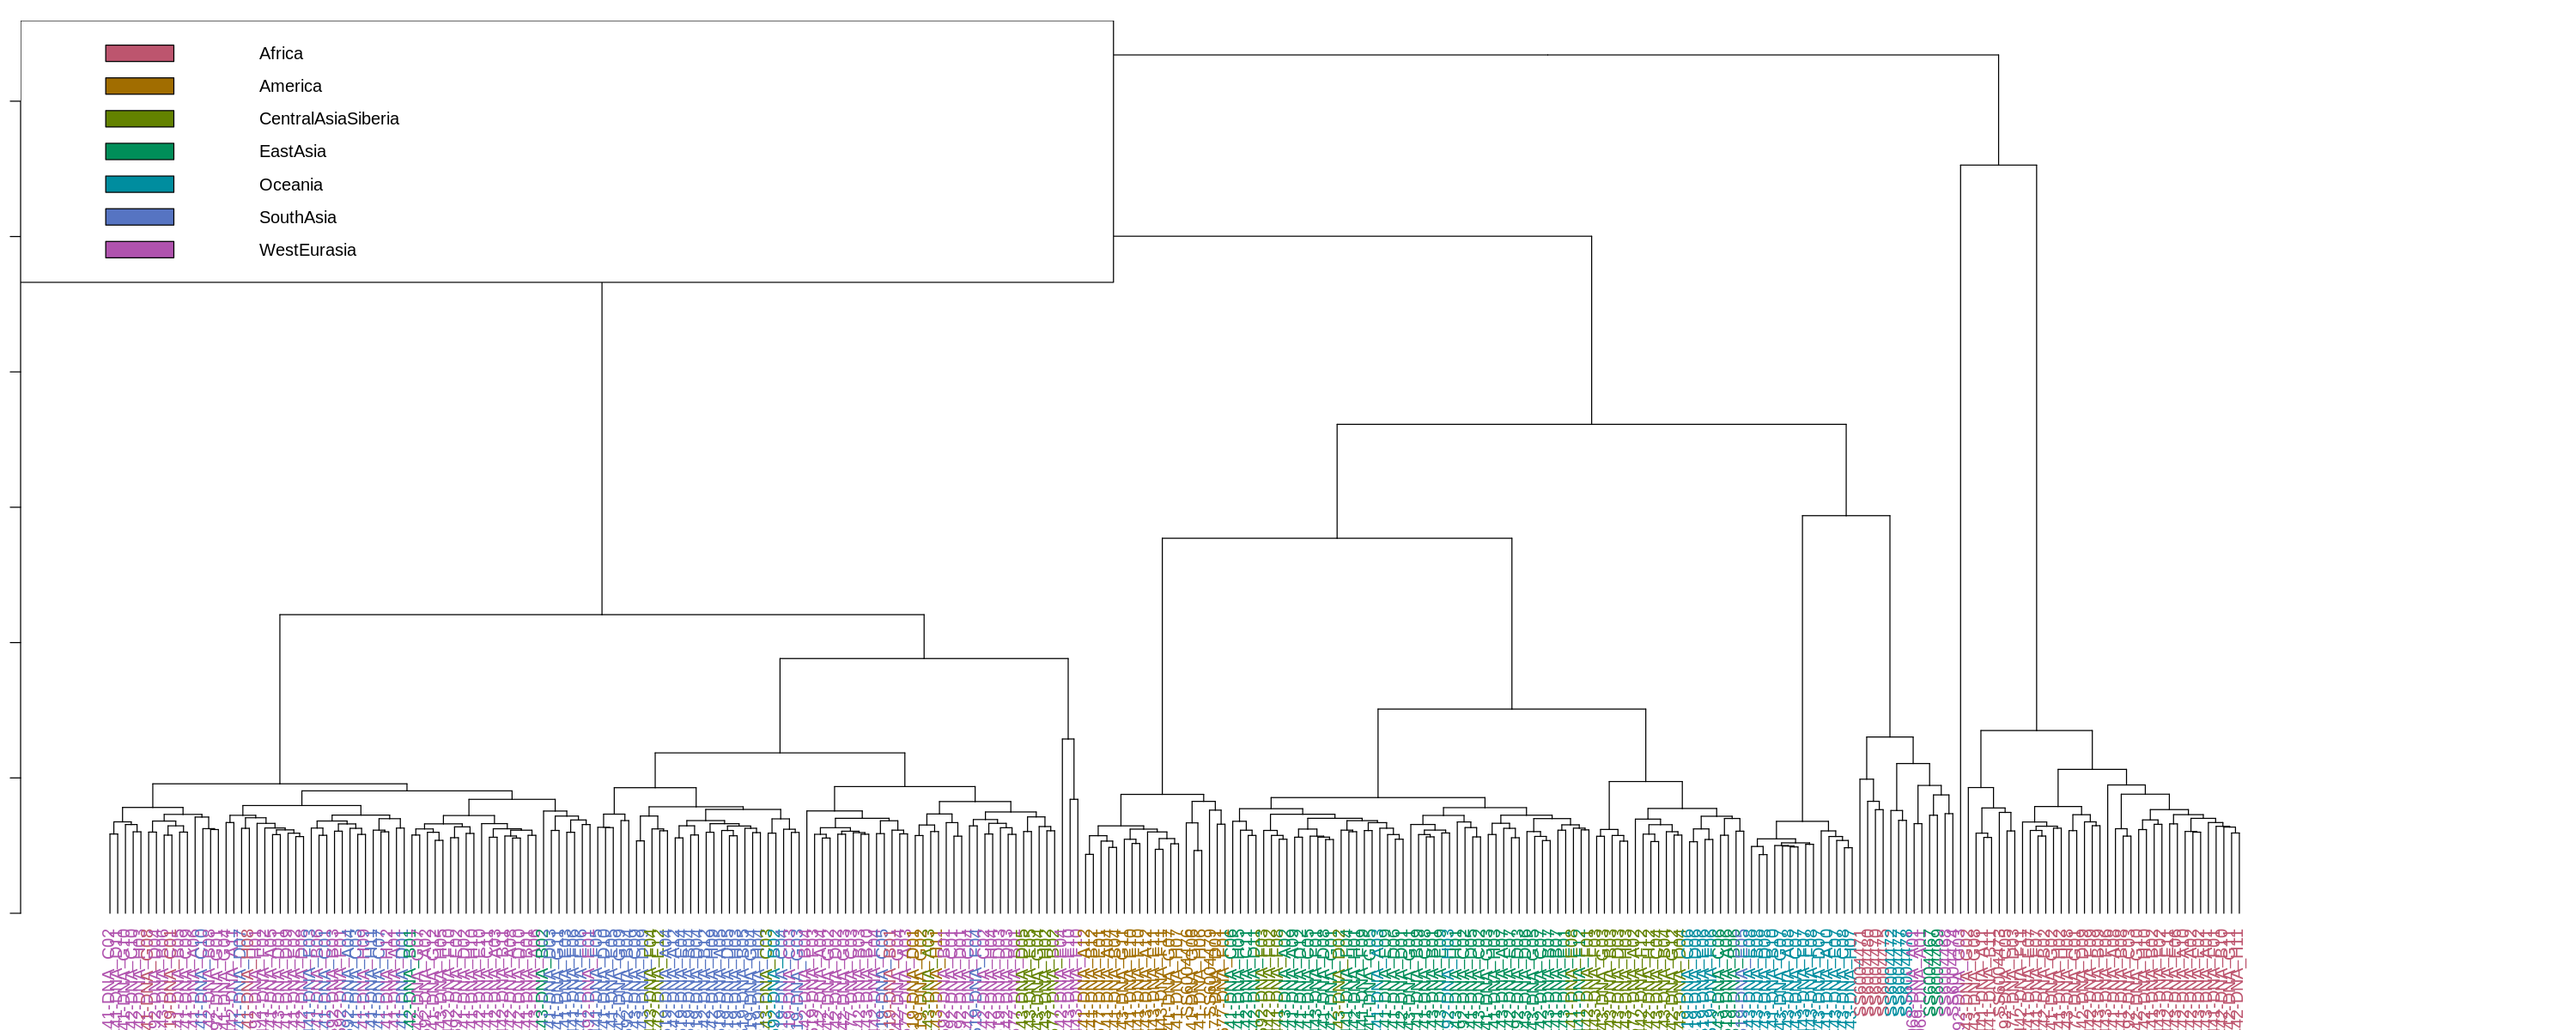

In [28]:
options(repr.plot.width=25, repr.plot.height=10) ; par(oma=c(0,0,0,0))
car_type <- regions$Region
n_car_types <- length(unique(car_type))
cols_7 <- colorspace::rainbow_hcl(n_car_types, c = 70, l  = 50)
col_car_type <- cols_7[car_type]
# color labels by car company
labels_colors(dend) <- col_car_type[order.dendrogram(dend)]
# color branches based on cutting the tree into 4 clusters:
#dend <- color_branches(dend, k = 10)\n",
par(mar = c(4,1,1,12))
plot(dend)
#colored_bars(cbind(k234[,3:1], col_car_type), dend, rowLabels = c(paste0(\"k = \", 4:2), \"Car Type\"), horiz = TRUE)\n",
legend("topleft", legend = levels(car_type), fill = cols_7)

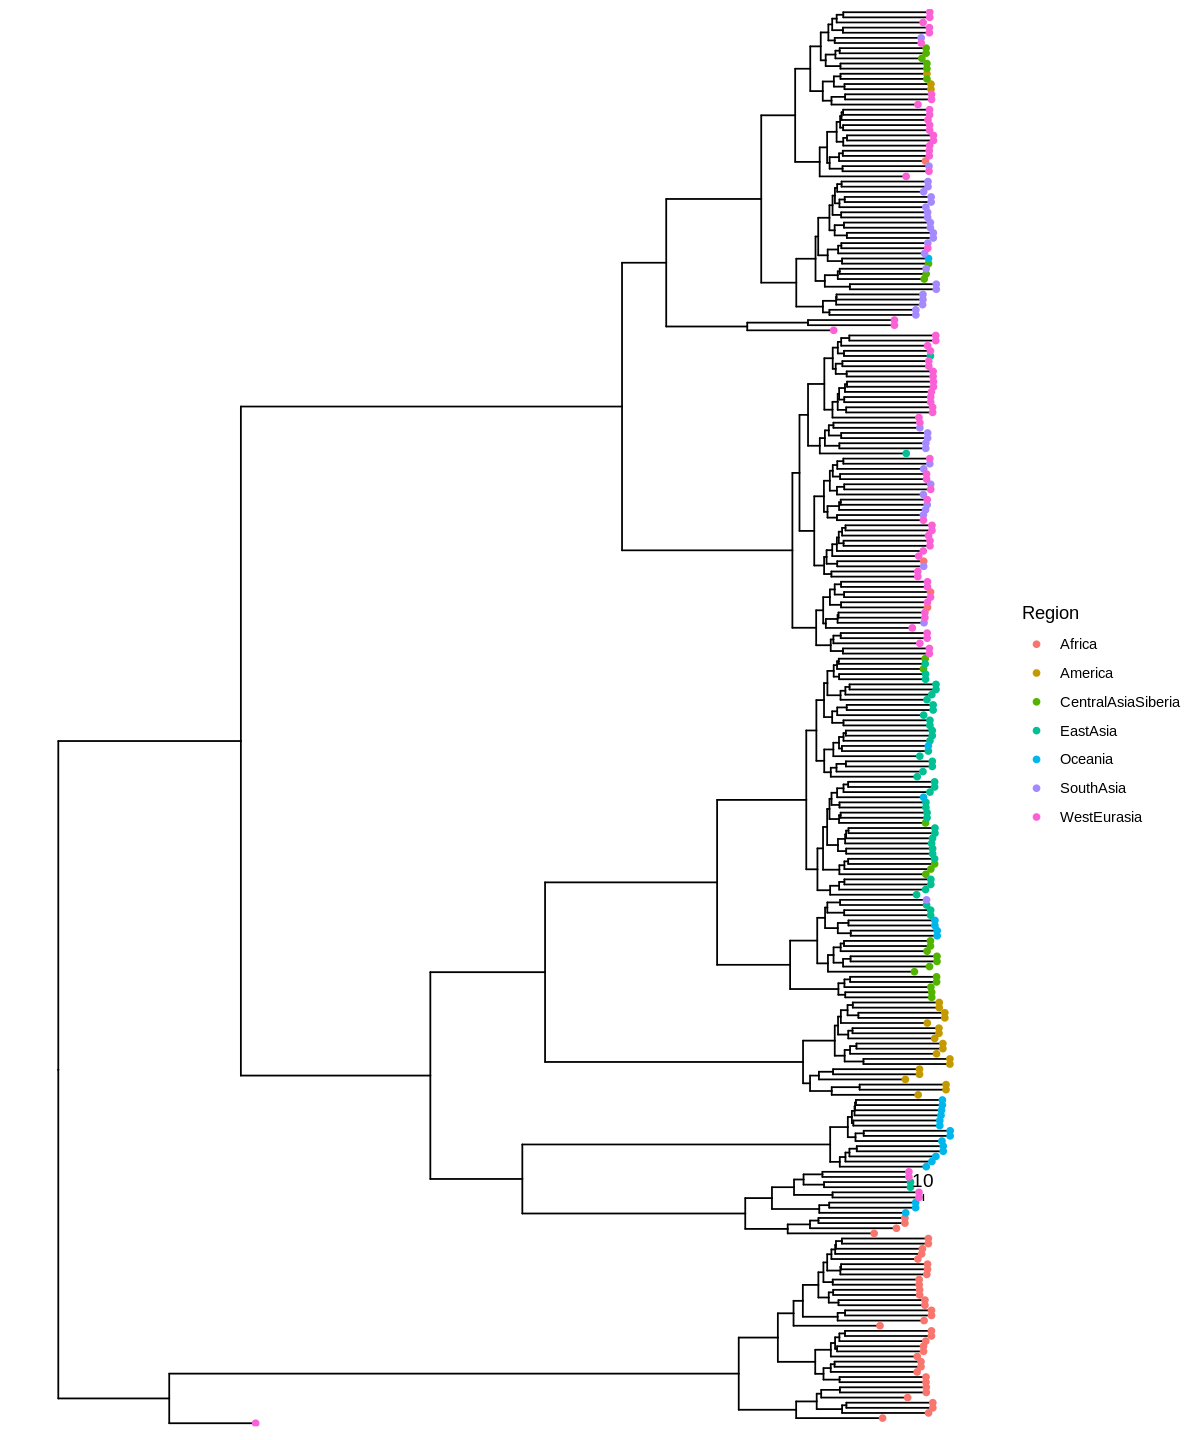

In [29]:
options(repr.plot.width=10, repr.plot.height=12) ; par(oma=c(0,0,0,0))
p1 <- ggtree(tre) %<+% regions + 
geom_tippoint(aes(color=Region)) + 
geom_treescale(x=0, y=45, fontsize=4, linesize=2, offset=2, width=10)
plot(p1)

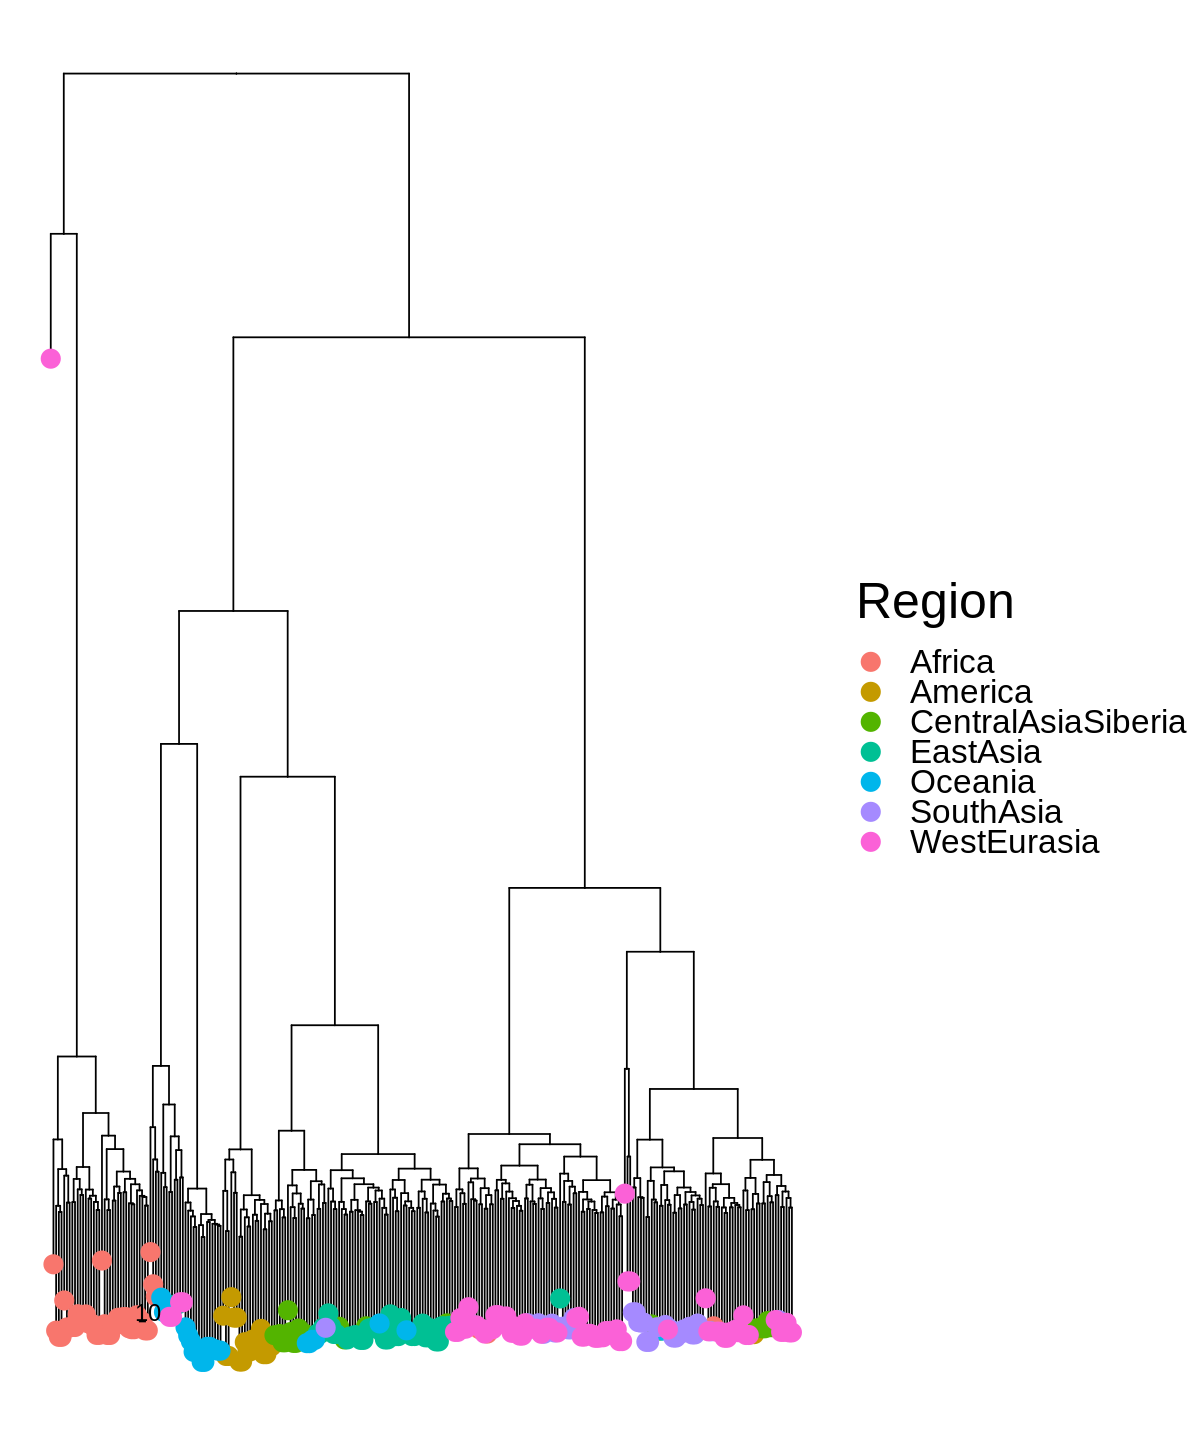

In [30]:
p1 <- ggtree(tre, layout="dendrogram") %<+% regions + 
geom_tippoint(aes(color=Region),  size=5) + # Colour code the tips with country\
# Adding in a scale
geom_treescale(x=0, y=35, fontsize=5, linesize=2, offset=2, width=10) +
theme(legend.title = element_text(size = 30), 
      legend.text = element_text(size = 20))
plot(p1)
#ggsave("../plots/ward_phylo_horiz.png", width = 25, height = 10)"

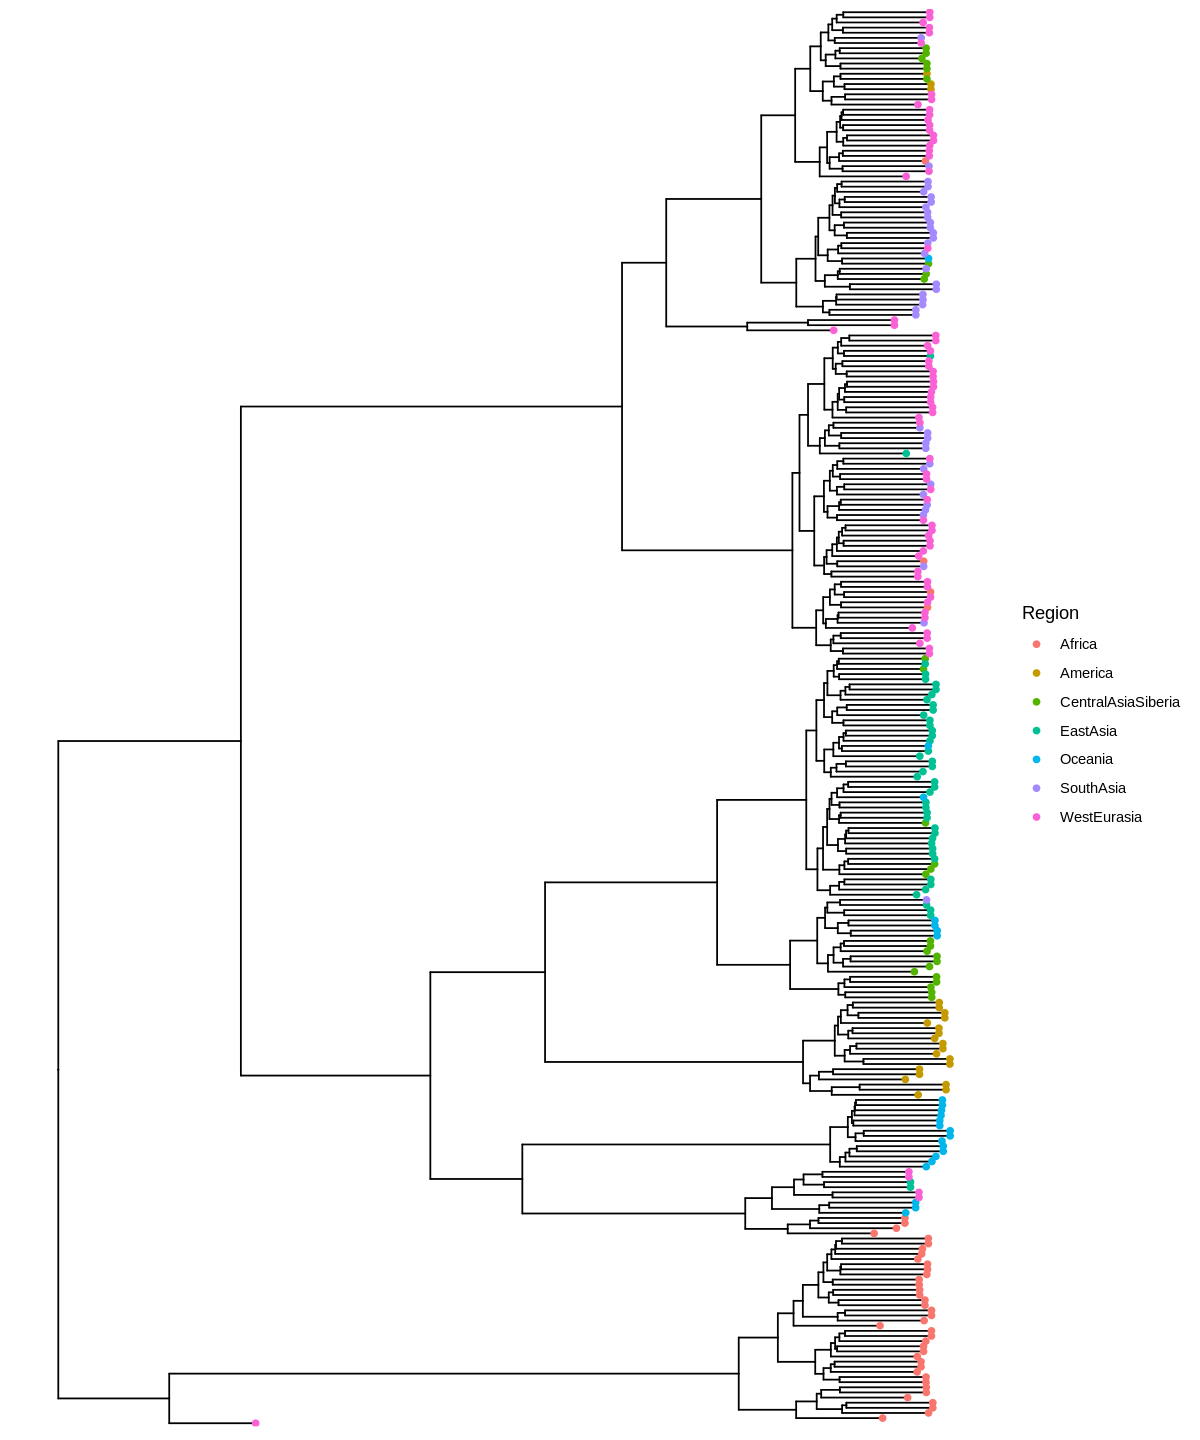

In [31]:
ggtree(tre) %<+% regions+ geom_tippoint(aes(color=Region))

In [32]:
options(repr.plot.width=25, repr.plot.height=10) ; par(oma=c(0,0,0,0))

Average angle change [1] 0.0337107094770874



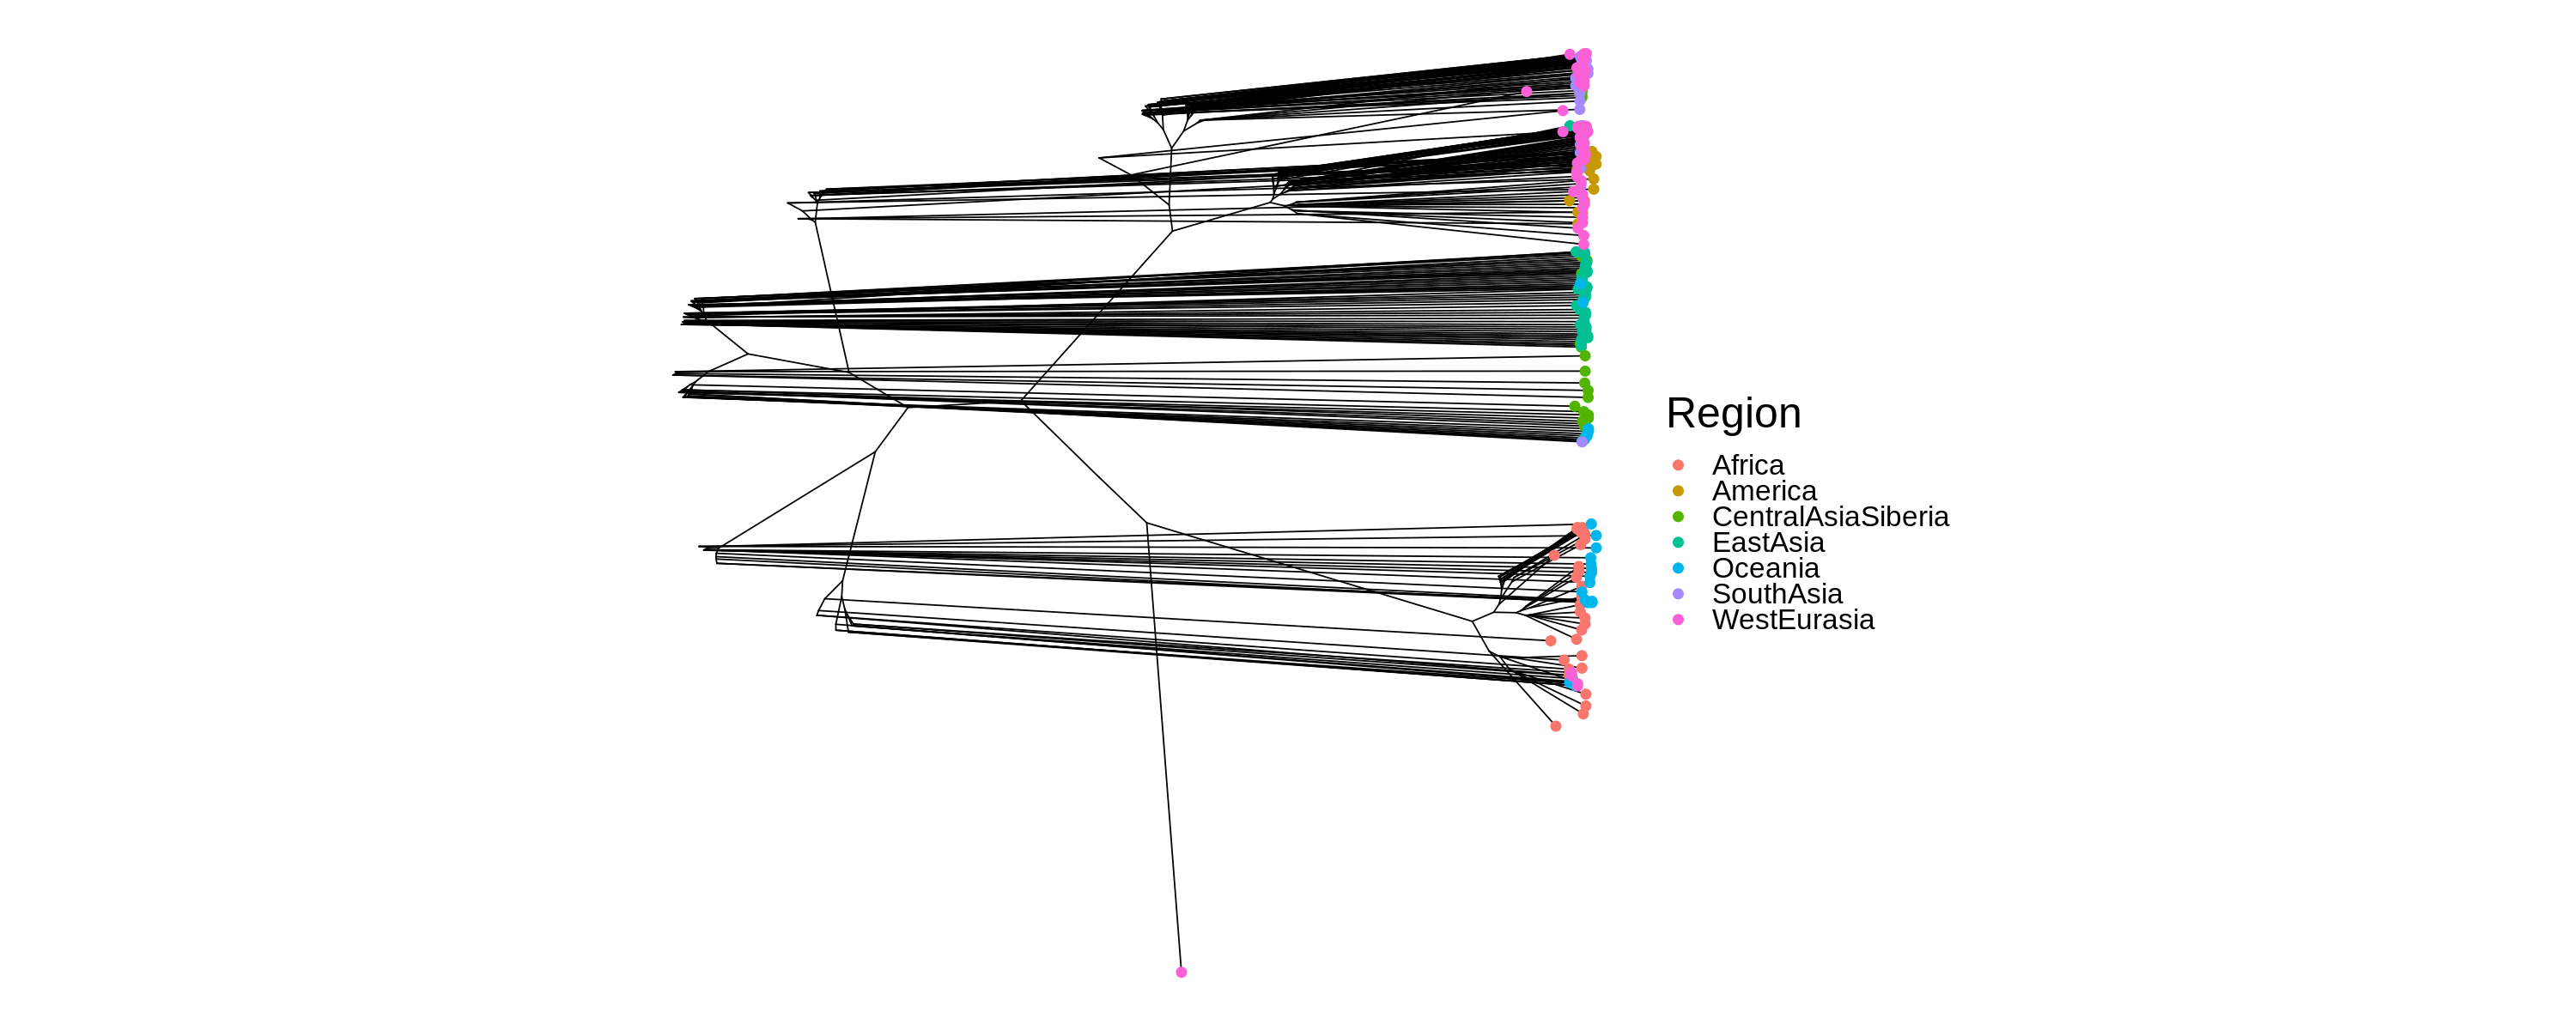

In [37]:
p1 <- ggtree(tre, layout="daylight") %<+% regions +
geom_tippoint(aes(color=Region), size=3) + # Colour code the tips with country\n",
# Adding in a scale
#geom_treescale(x=0, y=45, fontsize=5, linesize=2, offset=2, width=10)+
theme(legend.title = element_text(size = 30), 
      legend.text = element_text(size = 20))
plot(p1)
#ggsave("ward_phylo_daylight.png", width = 25, height = 10)

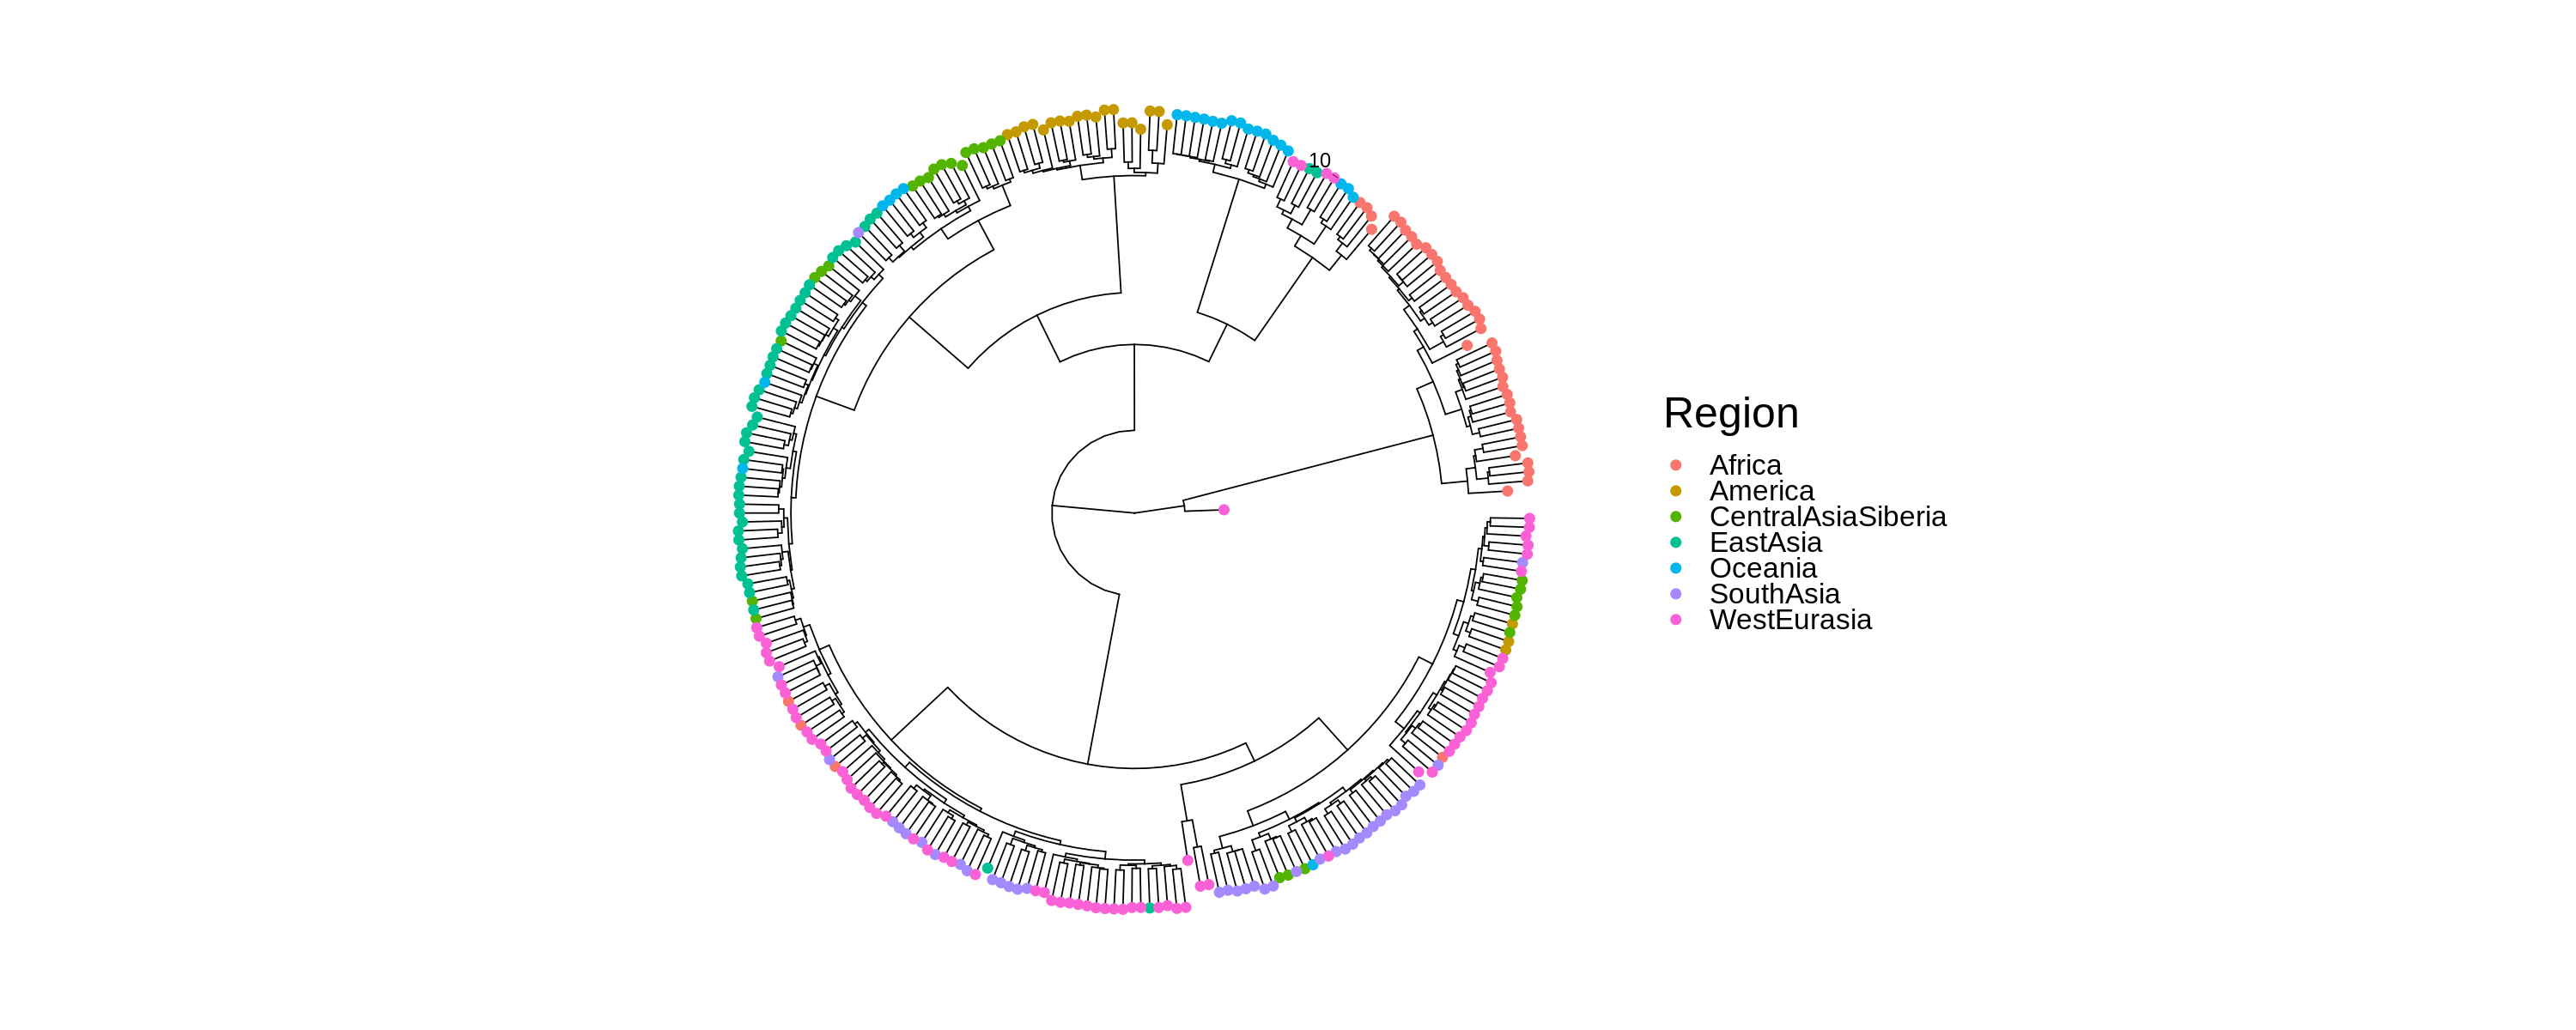

In [38]:
p1 <- ggtree(tre, layout="circular") %<+% regions +
geom_tippoint(aes(color=Region), size=3) + # Colour code the tips with country\n",
# Adding in a scale
geom_treescale(x=0, y=45, fontsize=5, linesize=2, offset=2, width=10)+
theme(legend.title = element_text(size = 30), 
      legend.text = element_text(size = 20))
plot(p1)
ggsave("../plots/ward_phylo_circular.png", width = 25, height = 10)

In [41]:
p1 <- ggtree(tre, layout="daylight") %<+% regions +
geom_tippoint(aes(color=Region), size=3)

Average angle change [1] 0.0337107094770874



Average angle change [1] 0.0337107094770874



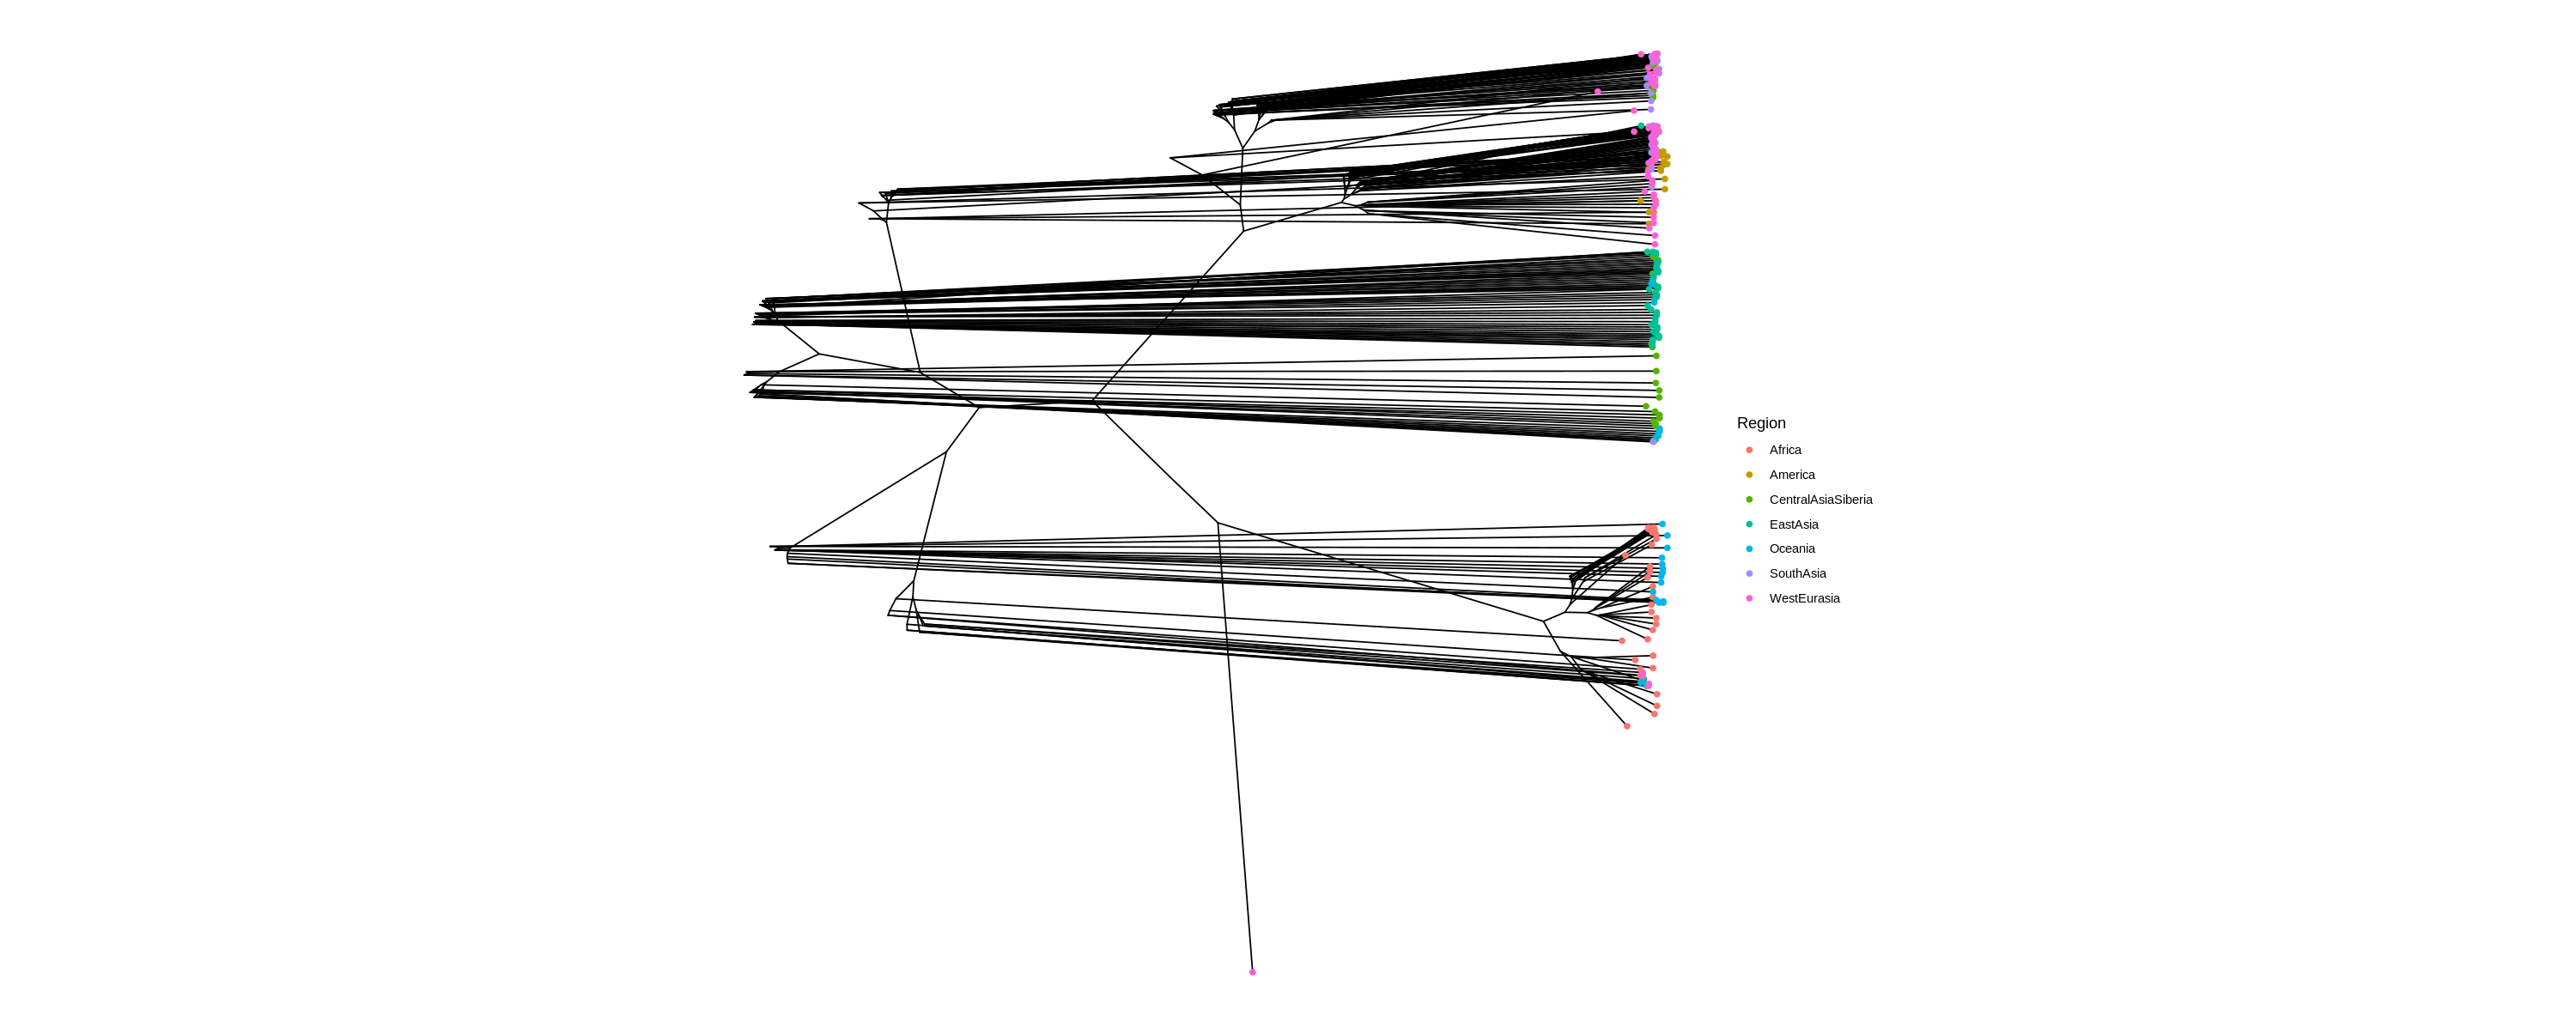

In [42]:
ggtree(tre, layout="daylight") %<+% regions+ geom_tippoint(aes(color=Region))